In [2]:
#1.Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
#2.Load and clean the data
train=pd.read_csv('train.csv')
train=pd.DataFrame(train)
test=pd.read_csv('test.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


3.Data preprocessing


In [5]:
#3a.duplicate values
print("Sum of duplicate values in train dataset:",sum(train.duplicated()))
print("Sum of duplicate values in test dataset:",sum(test.duplicated()))

Sum of duplicate values in train dataset: 0
Sum of duplicate values in test dataset: 0


In [6]:
#3b. Null values
print("Train null values:",train.isna().values.sum())
print("Test nulll values:",test.isna().values.sum())

Train null values: 0
Test nulll values: 0


In [7]:
#3c. Substituting any value with wanted values used during NLP applications

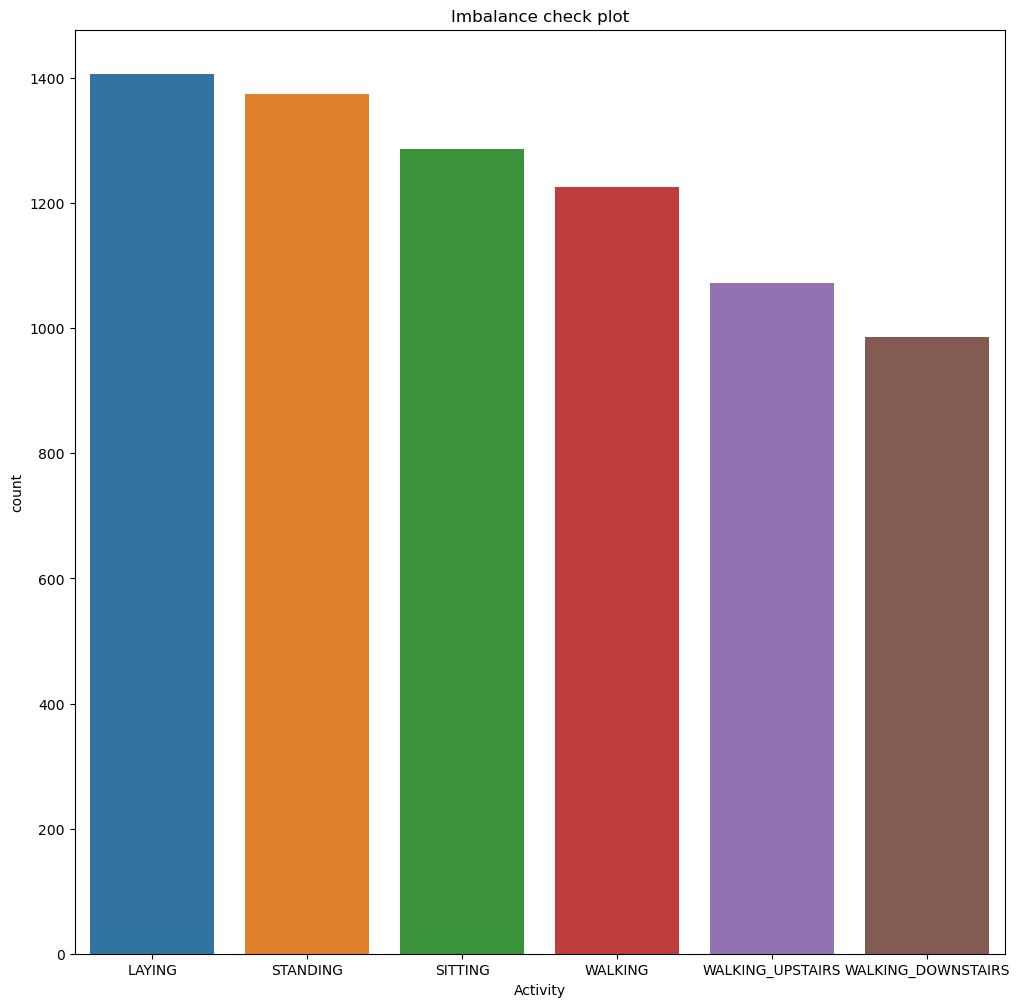

In [8]:
#3d. Checking for class imbalance
plt.figure(figsize=(12,12))
plt.title("Imbalance check plot")
train["Activity"] = pd.Series(train["Activity"])
sns.countplot(x="Activity",data=train,order=train['Activity'].value_counts().index)
#plt.xticks()
plt.show()

In [9]:
#Getting tarin and test datasets ready
X_train=train.drop(['subject','Activity'],axis=1)
y_train=train.Activity
X_test=test.drop(['subject','Activity'],axis=1)

y_test=test.Activity

In [10]:
#Using decision tree claasifer
parameters={"max_depth": np.arange(2,10,2)}
dt_classifier=DecisionTreeClassifier()
dt_classifier_rs= RandomizedSearchCV(dt_classifier,param_distributions=parameters,cv=10,random_state=42)
dt_classifier_rs.fit(X_train,y_train)

C:\Users\saich\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [11]:
y_pred = dt_classifier_rs.predict(X_test)

In [12]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8458458458458459
